# 矩阵和张量
$$\LaTeX$$

In [1]:
import numpy as np
import scipy
import sympy as sym
import matplotlib
import sklearn
sym.init_printing()

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("SymPy version:", sym.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SkLearn version:", sklearn.__version__)

NumPy version: 1.13.1
SciPy version: 0.19.1
SymPy version: 1.1.1
Matplotlib version: 2.0.2
SkLearn version: 0.19.0


## 符号说明

以下是要使用符号:

符号$A \in R^{m×n}$表示一个m行n列的矩阵，并且矩阵A中的所有元素都是实数, 可以写作$A_{mn}$。
符号$x \in R^n$表示一个含有n个元素的向量。通常，我们把n维向量看成是一个n行1列矩阵，即列向量。如果我们想表示一个行向量（1行n列矩阵），我们通常写作$x^T$ (xT表示x的转置，后面会解释它的定义)。
一个向量x的第i个元素表示为{x_i}：

我们用$a_{ij}$ (或$A_{ij}$) 表示第i行第j列的元素：

## 矩阵基础运算

In [23]:
x_11,x_12,x_13 = sym.var('x_11 x_12 x_13')
x_21,x_22,x_23 = sym.var('x_21 x_22 x_23')
x_31,x_32,x_33 = sym.var('x_31 x_32 x_33')
M = sym.Matrix([[x_11,x_12,x_13],[x_21,x_22,x_23],[x_31,x_32,x_33]])
M

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎣x₃₁  x₃₂  x₃₃⎦

In [40]:
v_1, v_2, v_3 = sym.var('v_1, v_2, v_3')
V = sym.Matrix([[v_1],[v_2],[v_3]])
M.dot(V)

### 矩阵运算性质
- 结合律即(AB)C = A(BC)
- 分配率即A(B + C) = AB + AC
- **矩阵乘法没有交换律**，即AB ≠BA.

结合律

In [9]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])

In [10]:
np.dot(np.dot(An,Bn),Cn)

array([[31, 27],
       [45, 39]])

In [11]:
np.dot(An,np.dot(Bn,Cn))

array([[31, 27],
       [45, 39]])

In [12]:
np.dot(np.dot(Cn,Bn),An)

array([[39, 27],
       [45, 31]])

分配律

In [13]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])

In [14]:
np.dot(An,(Bn+Cn))

array([[12, 10],
       [17, 15]])

In [15]:
np.dot(An,Bn)+np.dot(An,Cn)

array([[12, 10],
       [17, 15]])

In [16]:
np.dot((Bn+Cn),An)

array([[15, 10],
       [17, 12]])

## 公式推导工具
约定求和，用于张量运算

$$
A=a_{ij}e^i e^j\\
B=B_{km}e^k e^m\\
e^i\cdot e^j=\delta_{ij}\\
a_{ij} \delta_{ij}=a_{ii}
$$

$$
A\cdot B\\
\sum_k {a_{ik}b_{kj}} \triangleq a_{ik}b_{kj}
$$

$$
A\cdot B \cdot C=a_{ij} b_{jk} c_{km} e^i e^m
$$

## 单位矩阵对角矩阵

$$
I\cdot A = A\cdot I\\
I=\delta_{ij}
$$

In [21]:
E=sym.eye(3)
E

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [24]:
M*E

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎣x₃₁  x₃₂  x₃₃⎦

In [28]:
E[1,2]=1
E[1,0]=0
E*M

⎡   x₁₁        x₁₂        x₁₃   ⎤
⎢                               ⎥
⎢x₂₁ + x₃₁  x₂₂ + x₃₂  x₂₃ + x₃₃⎥
⎢                               ⎥
⎣   x₃₁        x₃₂        x₃₃   ⎦

## 矩阵转置

$$
A=a_{ij}\\
A^T=a_{ji}
$$

In [34]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])
An

array([[1, 1],
       [2, 1]])

In [33]:
np.transpose(An)

array([[1, 2],
       [1, 1]])

In [35]:
np.dot(An, Bn)

array([[5, 4],
       [7, 6]])

In [36]:
np.dot(np.transpose(Bn), np.transpose(An))

array([[5, 7],
       [4, 6]])

In [37]:
np.dot(Bn, An)

array([[6, 4],
       [7, 5]])

## 对称矩阵

$$
A^T=A
$$

In [38]:
A1=(An+np.transpose(An))/2
A2=(An-np.transpose(An))/2

In [39]:
A1

array([[ 1. ,  1.5],
       [ 1.5,  1. ]])

In [40]:
A2

array([[ 0. , -0.5],
       [ 0.5,  0. ]])

## 矩阵迹

$$
tr(A)=a_{ii}
$$

In [41]:
np.trace(np.dot(np.dot(An,Bn),Cn))

70

In [42]:
np.trace(np.dot(np.dot(Cn,Bn),An))

70

In [43]:
np.trace(np.dot(np.dot(Cn,An),Bn))

70

## 范数

$$
||v||^1=\sum_i |x_i|\\
||v||^2=x_i x_i\\
\cdots
$$

## 矩阵行列式

In [2]:
import numpy as np
mat = np.array([[1,1],[-1,1]])
det = np.linalg.det(mat)
det

2.0

## 矩阵逆

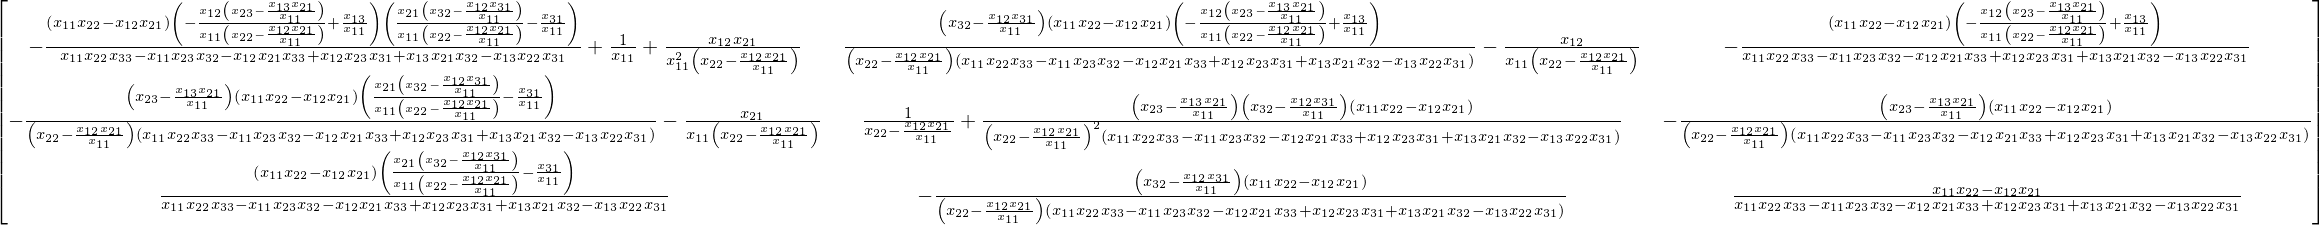

In [42]:
x_11,x_12,x_13 = sym.var('x_11 x_12 x_13')
x_21,x_22,x_23 = sym.var('x_21 x_22 x_23')
x_31,x_32,x_33 = sym.var('x_31 x_32 x_33')
M = sym.Matrix([[x_11,x_12,x_13],[x_21,x_22,x_23],[x_31,x_32,x_33]])
invM=M.inv()
invM

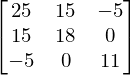

In [43]:
M = sym.Matrix([[25, 15, -5], [15, 18, 0],[-5, 0, 11]])
M

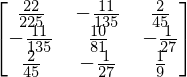

In [44]:
invM=M.inv()
invM

In [45]:
M.dot(invM)

定义方程
$$2x+3y=13\\x+y=5$$
矩阵书写形式：
$$A\cdot x = b$$
求解可得：
$$x=A^{-1}\cdot b$$

In [122]:
M=sym.Matrix([[2,3],[1,1]])
invM=M.inv()
b = sym.Matrix([[13],[5]])
invM.dot(b)

## 矩阵分解

## LU分解
求解方程：
$$A\cdot x=b$$
的过程中需要对其进行初等变换：
$$RA=\begin{bmatrix} 1&\cdots&0\\ \vdots&\ddots&\vdots \\r&\cdots&1 \end{bmatrix}\cdot A=U$$
$$U=\begin{bmatrix} u_{11}&\cdots&u_{nn}\\ \vdots&\ddots&\vdots \\0&\cdots&u_{1n} \end{bmatrix}$$

$$A=LU$$

In [135]:
L, U, T = M.LUdecomposition()

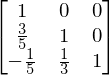

In [136]:
L

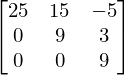

In [137]:
U

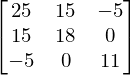

In [138]:
L*U

### QR分解

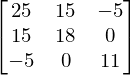

In [132]:
M = sym.Matrix([[25, 15, -5], [15, 18, 0],[-5, 0, 11]])
Q, R = M.QRdecomposition()
M

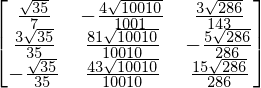

In [127]:
Q

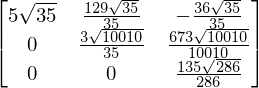

In [128]:
R

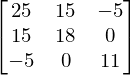

In [129]:
Q*R

**两种分解可以用于求解线性方程组以及求解矩阵的特征值**

## 矩阵特征值分解
$$M=E\Lambda E^{-1}$$

In [12]:
from numpy import linalg as LA
M = np.array([[25, 15, -5], [15, 18, 0],[-5, 0, 11]])
A, E = LA.eig(M)
print(M)

[[25 15 -5]
 [15 18  0]
 [-5  0 11]]


In [13]:
print(A)

[ 37.48885386   4.4954625   12.01568365]


In [14]:
print(E)

[[-0.78373593 -0.59500318 -0.17812698]
 [-0.60321859  0.66089251  0.44648453]
 [ 0.14793693 -0.45737547  0.87688217]]


In [17]:
ET=np.transpose(E)
np.dot(ET,E)

array([[  1.00000000e+00,   1.99610479e-16,   1.72809357e-16],
       [  1.99610479e-16,   1.00000000e+00,   2.88286088e-16],
       [  1.72809357e-16,   2.88286088e-16,   1.00000000e+00]])

In [21]:
Lambda=np.diag(A)
print(Lambda)
np.dot(E,np.dot(Lambda,ET))

[[ 37.48885386   0.           0.        ]
 [  0.           4.4954625    0.        ]
 [  0.           0.          12.01568365]]


array([[  2.50000000e+01,   1.50000000e+01,  -5.00000000e+00],
       [  1.50000000e+01,   1.80000000e+01,   2.42610070e-15],
       [ -5.00000000e+00,   2.52871842e-15,   1.10000000e+01]])

## SVD 分解

$$M = U\Lambda V$$

In [18]:
import numpy as np
M = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
M

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [19]:
U, A, V = np.linalg.svd(M, full_matrices=True)

In [20]:
U

array([[-0.21956688,  0.53396977, -0.48030985,  0.45219595,  0.02811389,
         0.48030985],
       [-0.35264795, -0.45713538, -0.30371038, -0.31508521,  0.61879559,
         0.30371038],
       [-0.57221483,  0.07683439,  0.75680405,  0.17257785,  0.0706181 ,
         0.24319595],
       [ 0.21956688, -0.53396977,  0.03329824,  0.79735166,  0.1693501 ,
        -0.03329824],
       [ 0.35264795,  0.45713538,  0.20989771,  0.03007049,  0.7600318 ,
        -0.20989771],
       [ 0.57221483, -0.07683439,  0.24319595, -0.17257785, -0.0706181 ,
         0.75680405]])

In [21]:
m=np.shape(U)[0]
n=np.shape(V)[0]
mn = np.min([m, n])
Lambda = np.zeros([m, n])
print(m)
Lambda[:mn,:mn] = np.diag(A)
Lambda

6


array([[ 6.30061232,  0.        ],
       [ 0.        ,  0.54980396],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [22]:
V

array([[ 0.83849224,  0.54491354],
       [ 0.54491354, -0.83849224]])

In [23]:
np.dot(U, np.dot(Lambda, V))

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

## PCA method

In [38]:
from sklearn.decomposition import PCA
import numpy as np

In [39]:
M = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(M)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca.explained_variance_ratio_)

[ 0.99244289  0.00755711]


In [41]:
U, A, V = np.linalg.svd(M, full_matrices=True)
A2=A**2
SA2=np.sum(A2)
print(A2[0]/SA2,A2[1]/SA2)

0.99244289009 0.00755710991019


In [4]:
# PCA计算
import numpy as np
def pca(X):
    m,n = X.shape
    
    # 计算协方差
    C = 1.0/m*X.T.dot(X)
    
    # 特征值赋值给evalues，对应特征向量赋值给evectors
    evalues,evectors = np.linalg.eig(C) 
    
    # 特征值从大到小排列，返回数组索引
    sorted_indices = np.argsort(-evalues)
    
    
    # 特征向量按特征值大小从左到右排列
    sorted_evectors = evectors[:,sorted_indices]
    sorted_evalues = evalues[sorted_indices]
    
    return sorted_evectors,np.diag(sorted_evalues),sorted_evalues

In [5]:
pca(np.array([[1,2],[3,4],[5,6]]))

(array([[-0.61962948, -0.78489445],
        [-0.78489445,  0.61962948]]), array([[ 30.24516497,   0.        ],
        [  0.        ,   0.08816836]]), array([ 30.24516497,   0.08816836]))